In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import binascii

from pcap_info import *

%matplotlib inline

In [2]:
from pypacker import ppcap
from pypacker.pypacker import mac_bytes_to_str, mac_str_to_bytes, pack_mac, unpack_mac
from pypacker.layer12 import radiotap, ieee80211, ethernet

In [3]:
sns.set()

In [9]:
# Config
pcap_dir = './captures'
mac_file = '../pcap/mac_addresses.txt'

In [6]:
# Utils
def map_pcap(f, pcap_name, lowest_layer=None, pktfilter=None):
    pcap = ppcap.Reader(pcap_name, lowest_layer=lowest_layer, pktfilter=pktfilter)
    xs, ys = [], []
    bt = None
    for ts, buf in pcap:
        if bt is None: bt = ts
        xs.append((ts - bt)/(60 * 10**9))
        ys.append(f(buf))
    return xs, ys

In [7]:
# Mapping
def len_radiotap(rt):
    return len(rt.body_bytes)

def len_eth(eth):
    return len(eth)

In [10]:
with open(mac_file) as f:
    print(f.read())

Benjamin
- Lenovo PC: 5c:c5:d4:7d:f1:ae
- LG Android Phone: a8:b8:6e:21:6f:54
- Router: 00:50:f1:80:00:00
- WeMo Insight Smart Plug: 14:91:82:b4:47:0d
- Neo Switch: b4:43:0d:b9:b9:92
- Hikenri: 60:01:94:34:2f:a5
- IHome: 40:9f:38:18:d7:5f
- DLink: 90:8d:78:e3:79:89
- ????: 00:71:c2:b4:72:58
- TP-Link Adapter: c0:25:e9:1b:77:12
- DLink Sensor: 70:62:b8:93:82:3c
- SimpleHome Sensor: 18:fe:34:dc:7b:eb
- TP-Link switch: 70:4f:57:ff:61:de
- MartinJerry: 60:01:94:92:b2:4a
- Tuya: 60:01:94:92:8d:03
- Edimax: 74:da:38:4a:d2:4f
- Cevitor: 60:01:94:51:62:7C
- AWS button: 88:71:e5:a8:9b:a9
- DLink Motion: 70:62:b8:93:82:3c



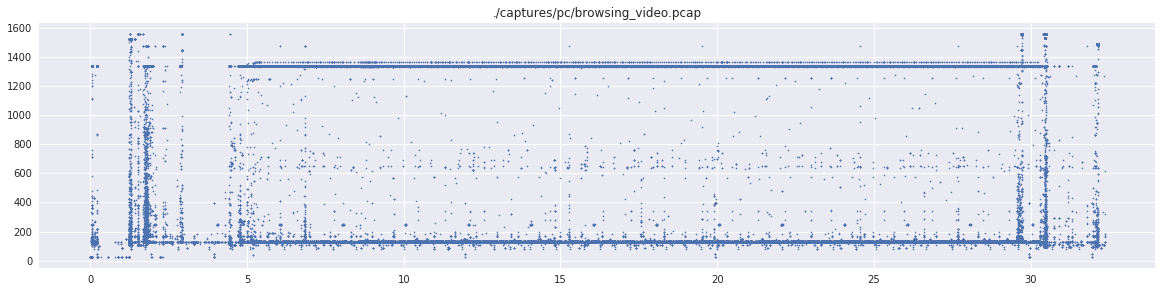

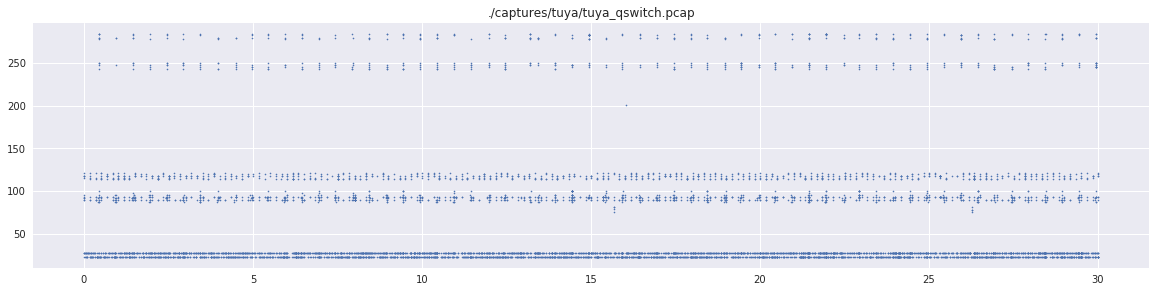

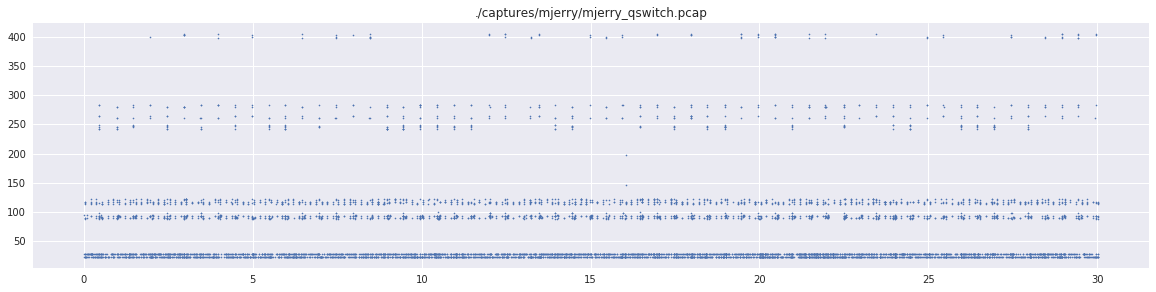

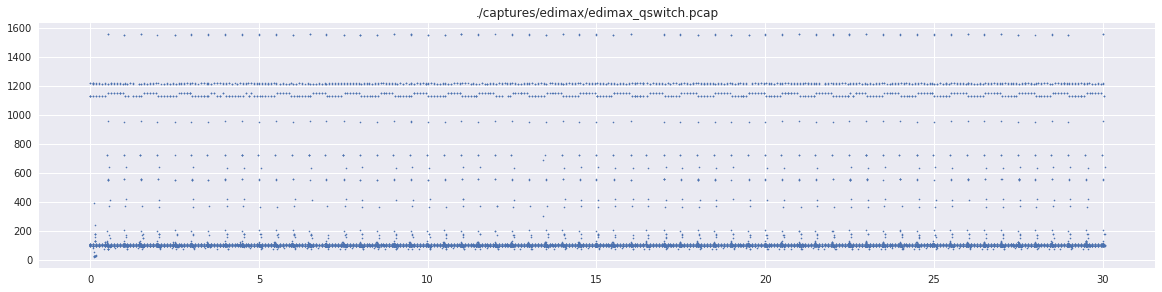

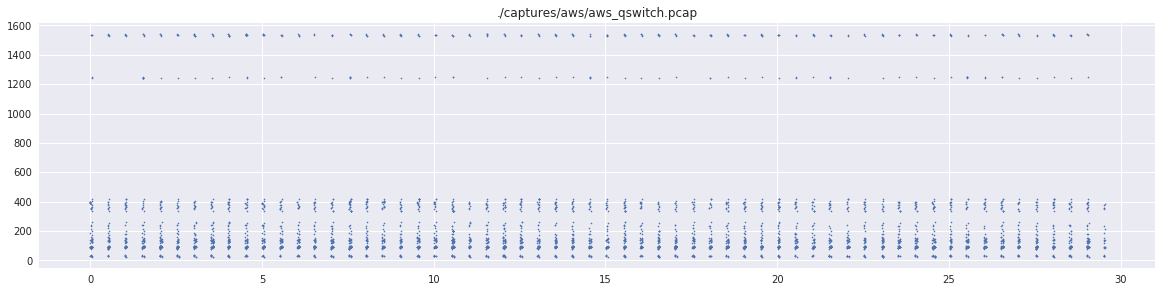

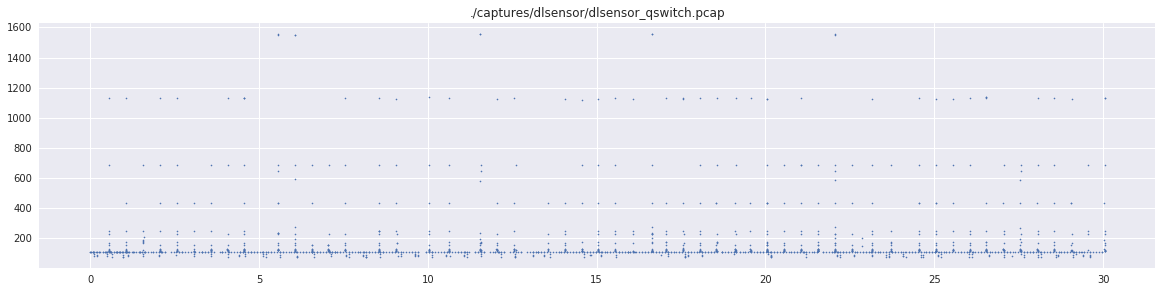

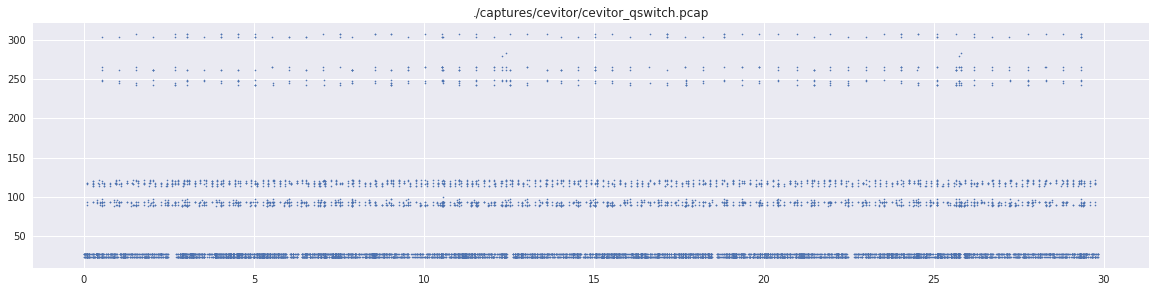

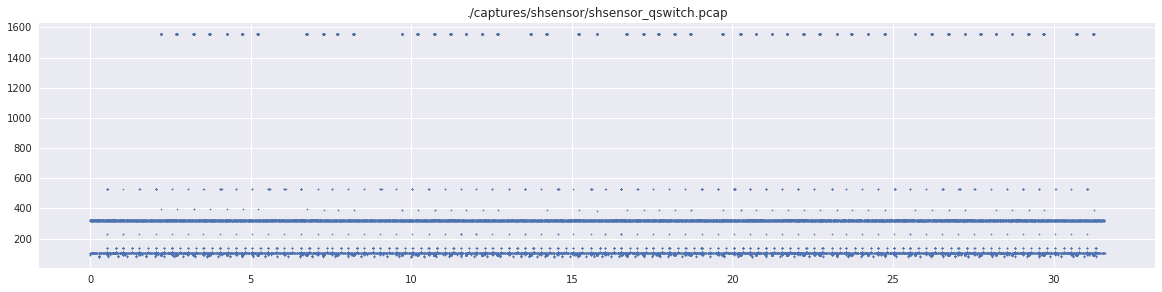

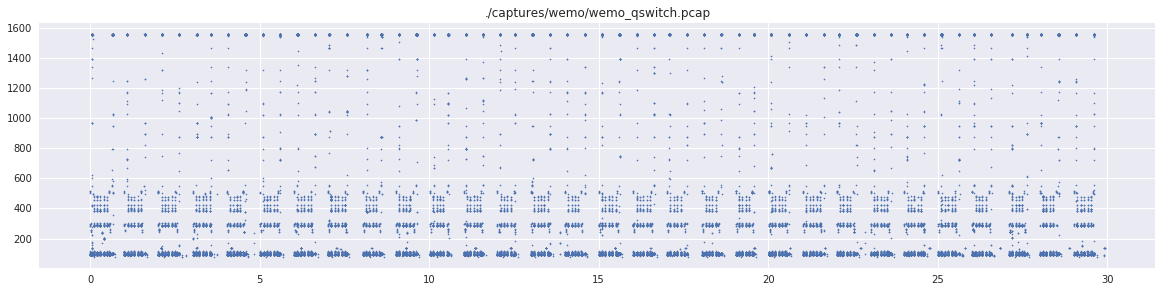

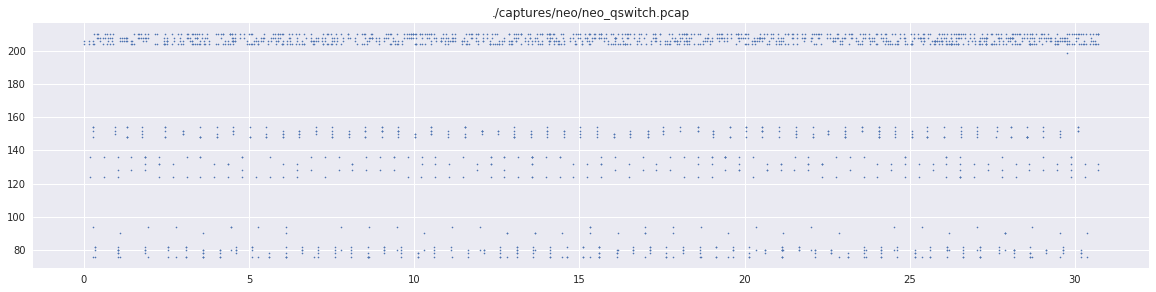

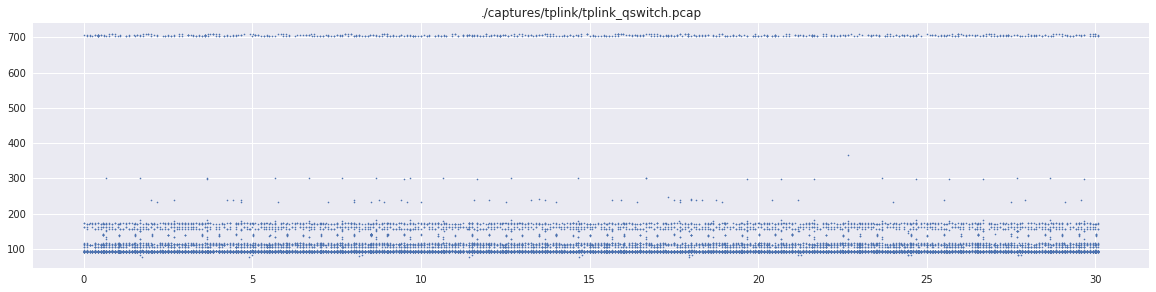

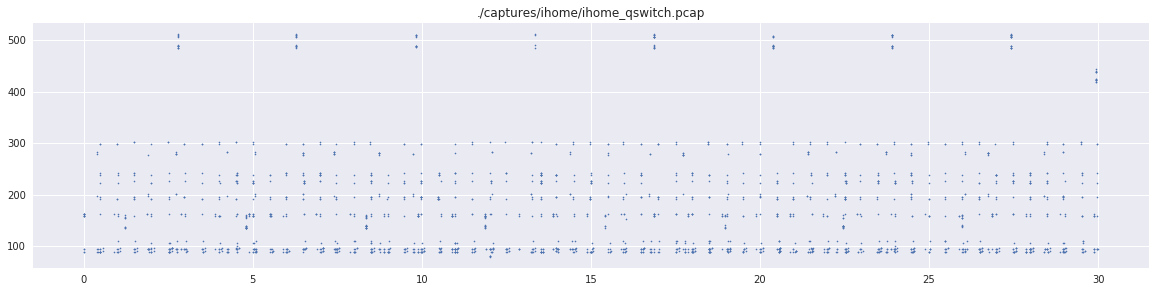

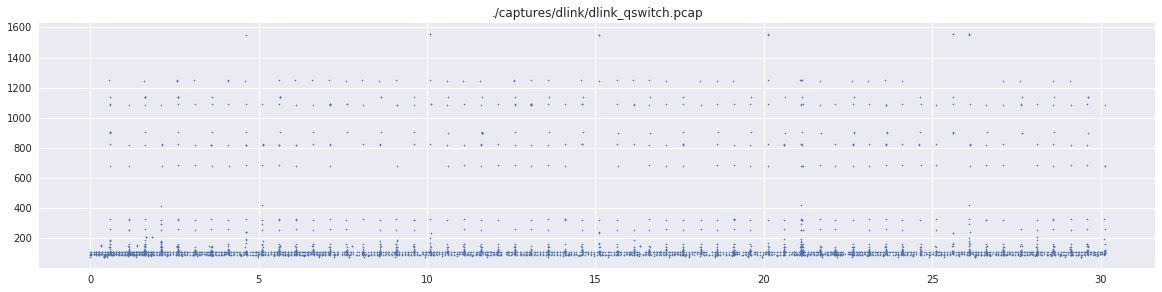

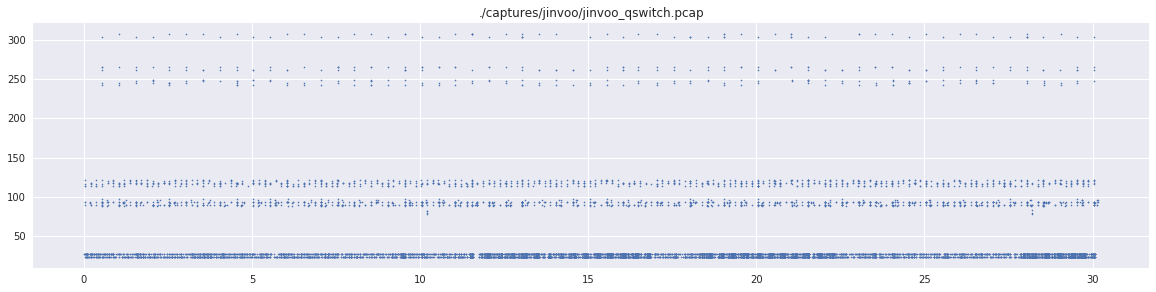

In [13]:
for dev in pcaps:
    pcap_name = pcaps[dev][0]
    fig = plt.figure(figsize=(20, 4.5))
    ax = fig.add_subplot(1, 1, 1)
    xs, ys = map_pcap(len_radiotap, pcap_name, lowest_layer=radiotap.Radiotap)
    ax.scatter(xs, ys, s=1.5)
    ax.set_title(pcap_name)

### Old Figures

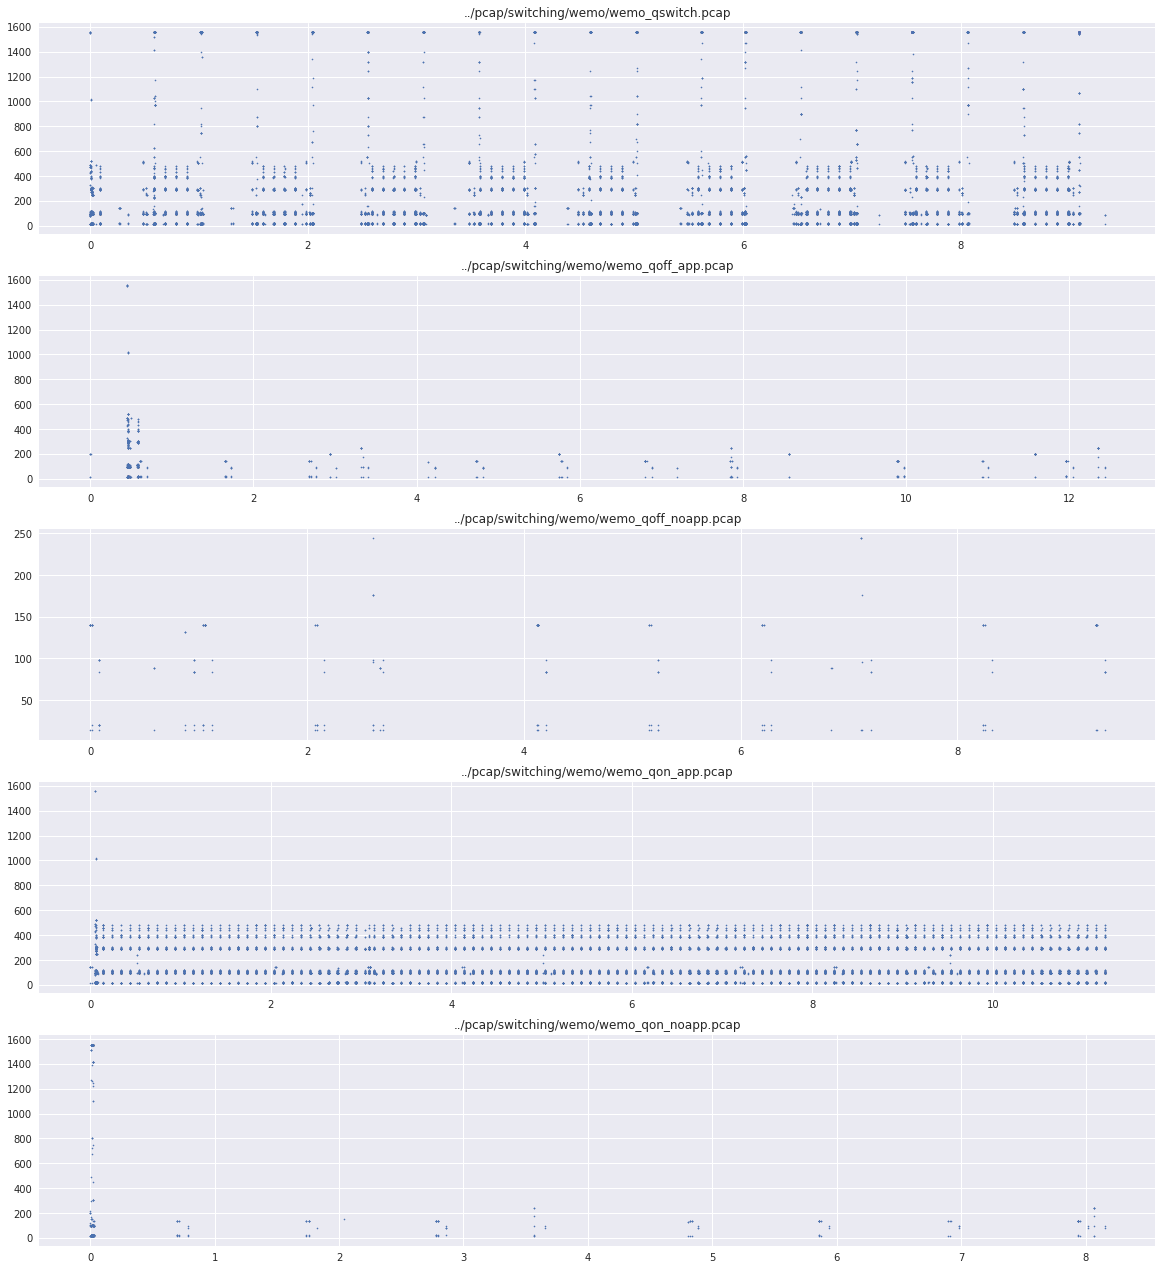

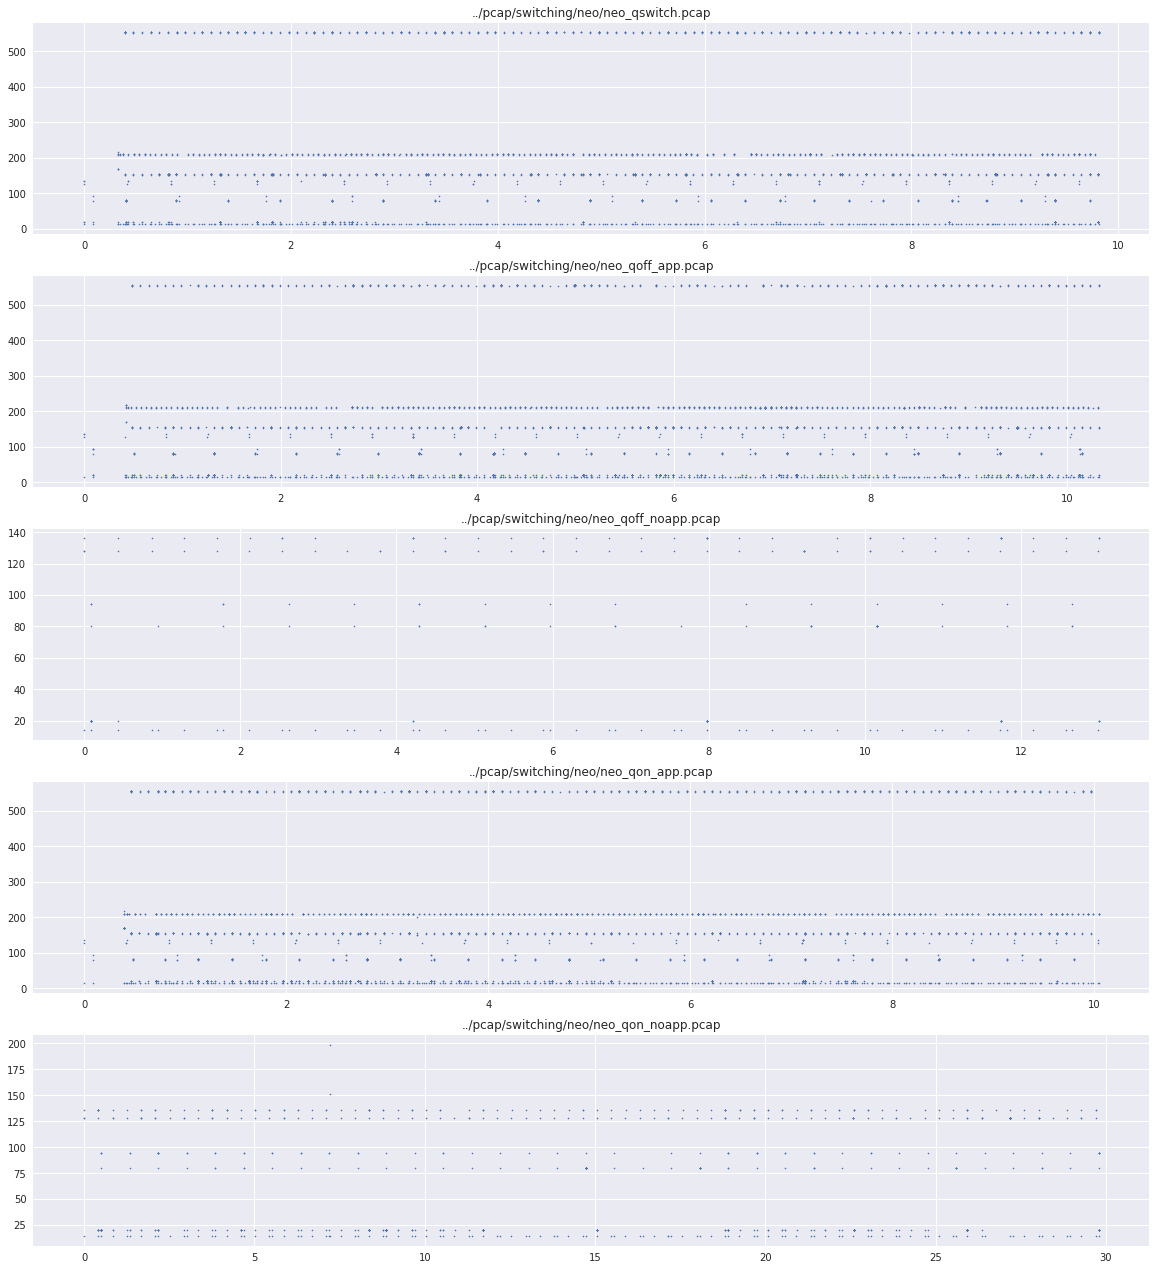

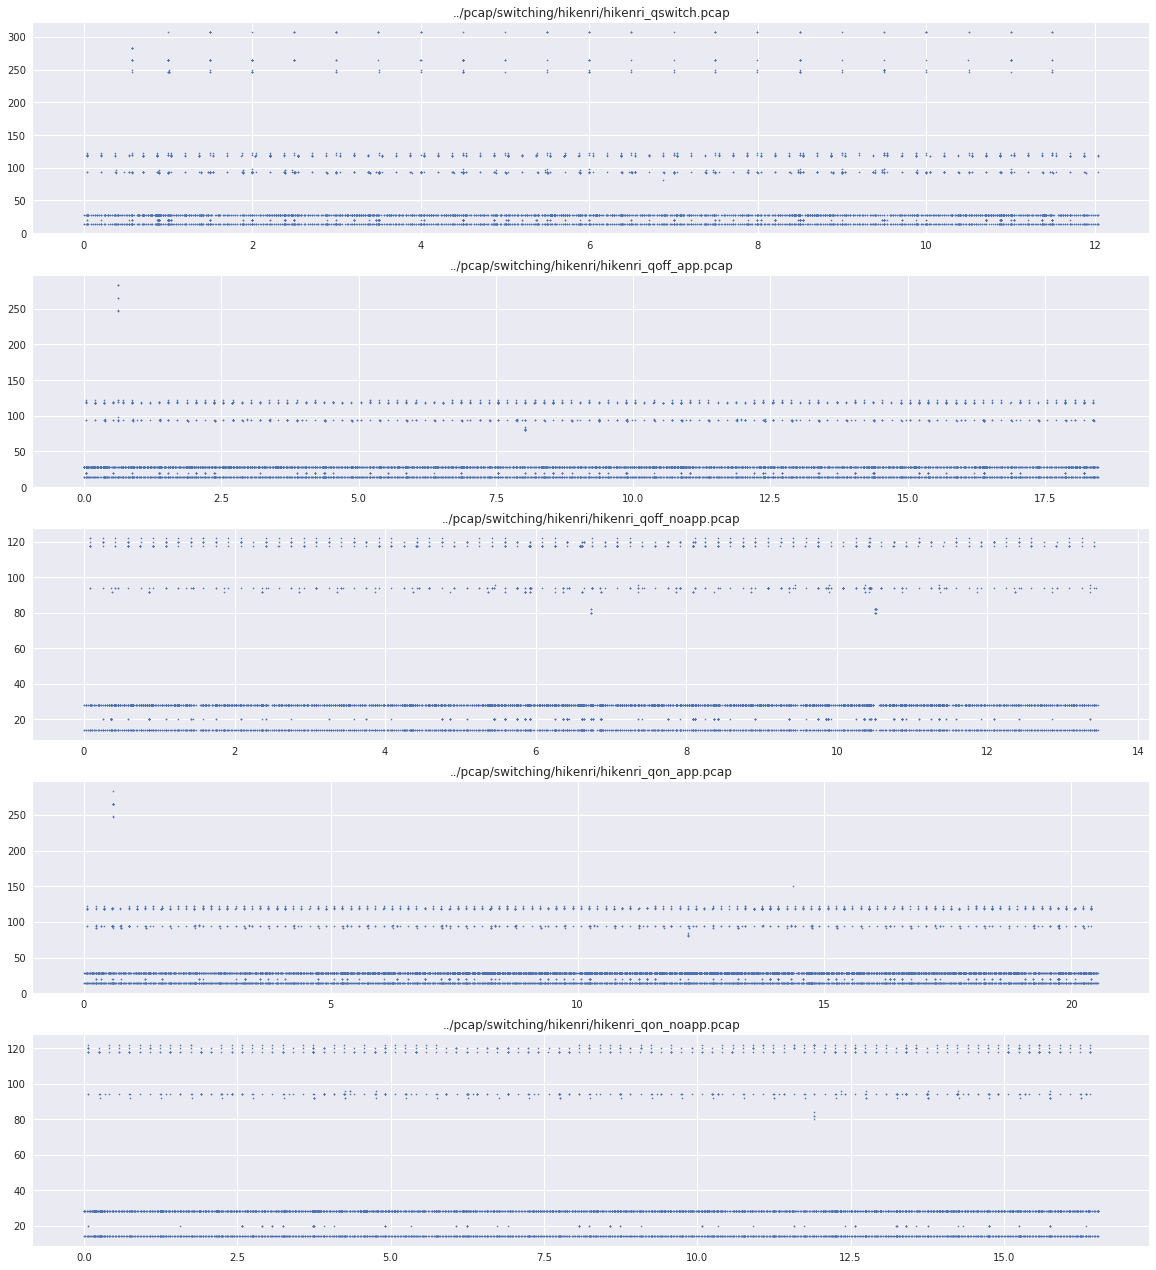

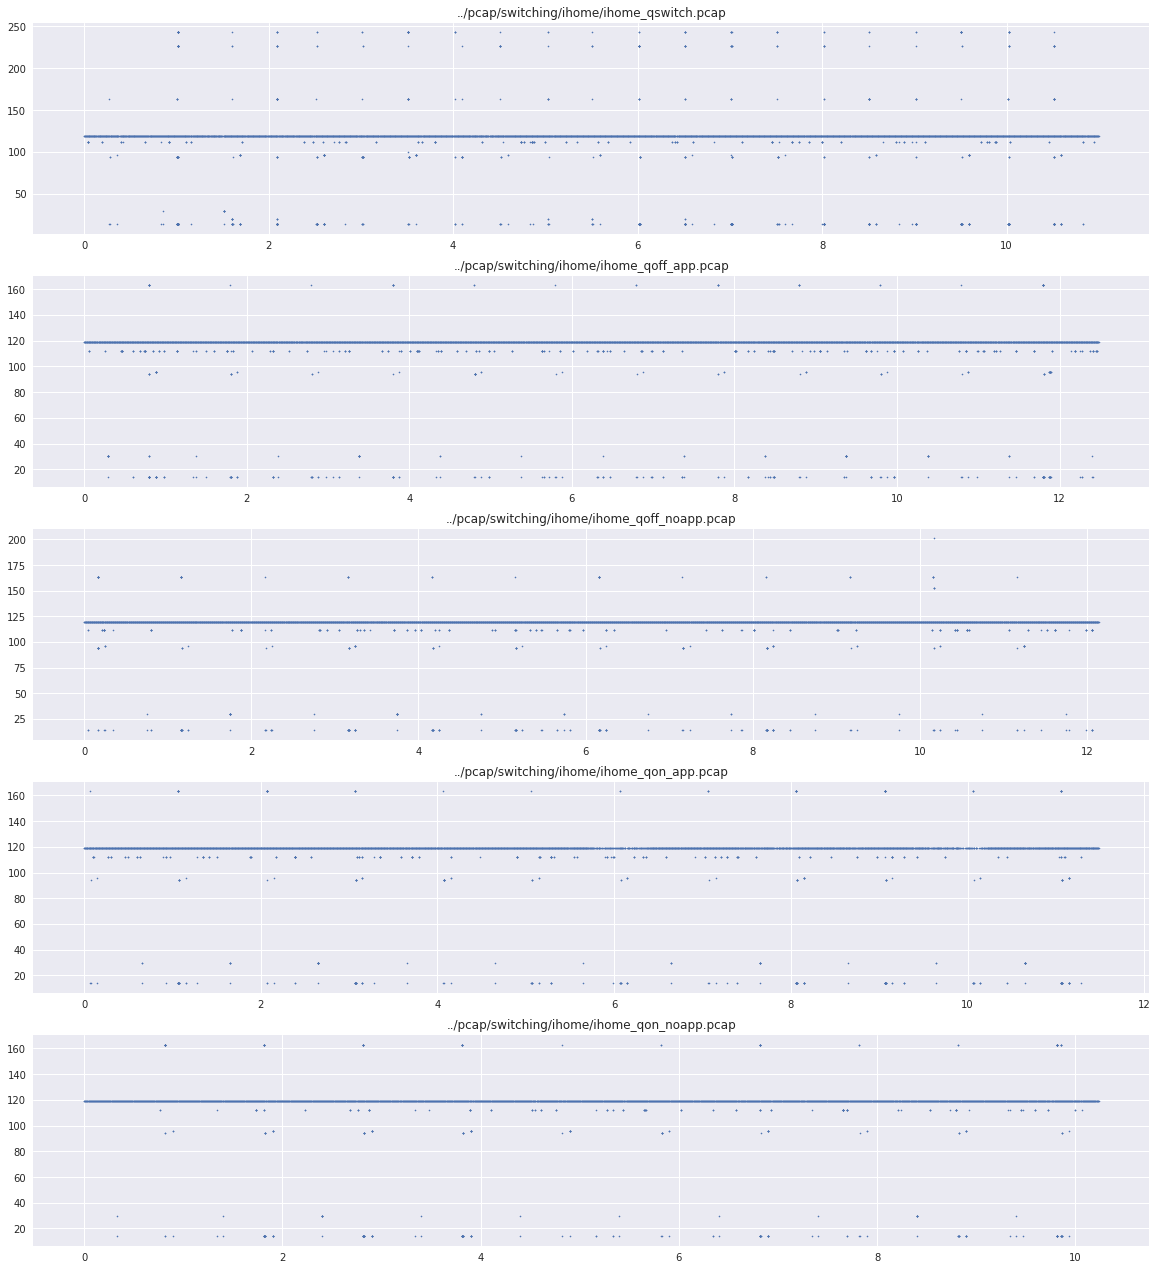

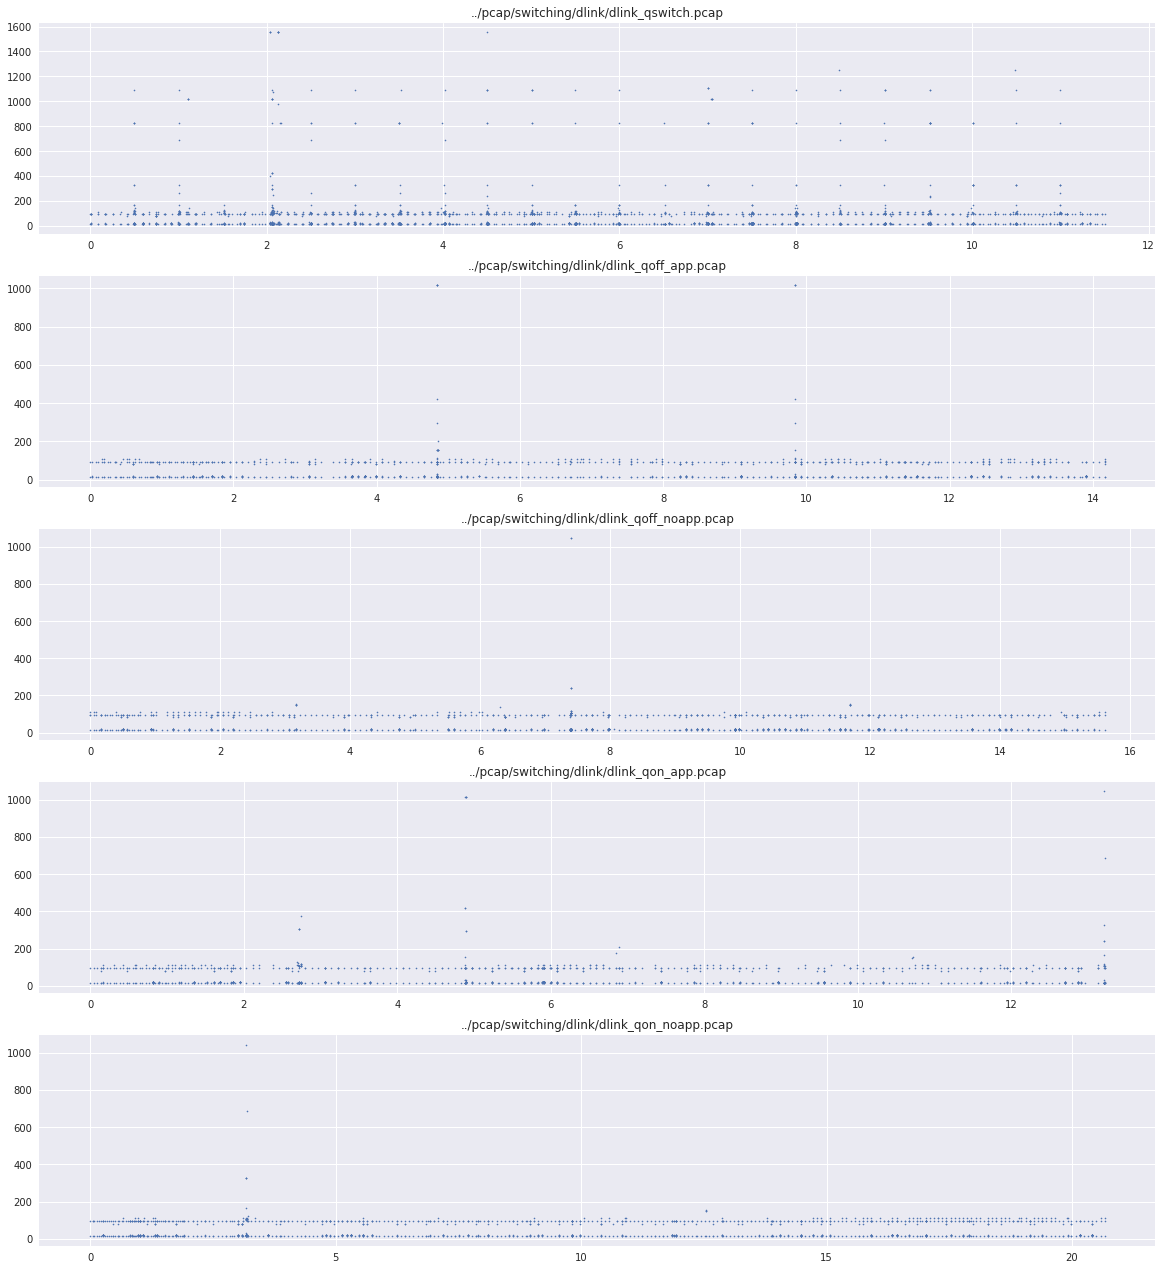

In [12]:
fig = plt.figure(figsize=(20, 4.5 * 5))
filt = filter_mac_any(wemo_mac)
for i, pcap_name in enumerate(pcaps['wemo']):
    ax = fig.add_subplot(5, 1, i + 1)
    xs, ys = map_pcap(len_radiotap, pcap_name, pktfilter=filt, lowest_layer=radiotap.Radiotap)
    ax.scatter(xs, ys, s=1.5)
    ax.set_title(pcap_name)

fig = plt.figure(figsize=(20, 4.5 * 5))
filt = filter_mac_any(neo_mac)
for i, pcap_name in enumerate(pcaps['neo']):
    ax = fig.add_subplot(5, 1, i + 1)
    xs, ys = map_pcap(len_radiotap, pcap_name, pktfilter=filt, lowest_layer=radiotap.Radiotap)
    ax.scatter(xs, ys, s=1.5)
    ax.set_title(pcap_name)

fig = plt.figure(figsize=(20, 4.5 * 5))
filt = filter_mac_any(hikenri_mac)
for i, pcap_name in enumerate(pcaps['hikenri']):
    ax = fig.add_subplot(5, 1, i + 1)
    xs, ys = map_pcap(len_radiotap, pcap_name, pktfilter=filt, lowest_layer=radiotap.Radiotap)
    ax.scatter(xs, ys, s=1.5)
    ax.set_title(pcap_name)

fig = plt.figure(figsize=(20, 4.5 * 5))
filt = filter_mac_any(ihome_mac)
for i, pcap_name in enumerate(pcaps['ihome']):
    ax = fig.add_subplot(5, 1, i + 1)
    xs, ys = map_pcap(len_radiotap, pcap_name, pktfilter=filt, lowest_layer=radiotap.Radiotap)
    ax.scatter(xs, ys, s=1.5)
    ax.set_title(pcap_name)

fig = plt.figure(figsize=(20, 4.5 * 5))
filt = filter_mac_any(dlink_mac)
for i, pcap_name in enumerate(pcaps['dlink']):
    ax = fig.add_subplot(5, 1, i + 1)
    xs, ys = map_pcap(len_radiotap, pcap_name, pktfilter=filt, lowest_layer=radiotap.Radiotap)
    ax.scatter(xs, ys, s=1.5)
    ax.set_title(pcap_name)

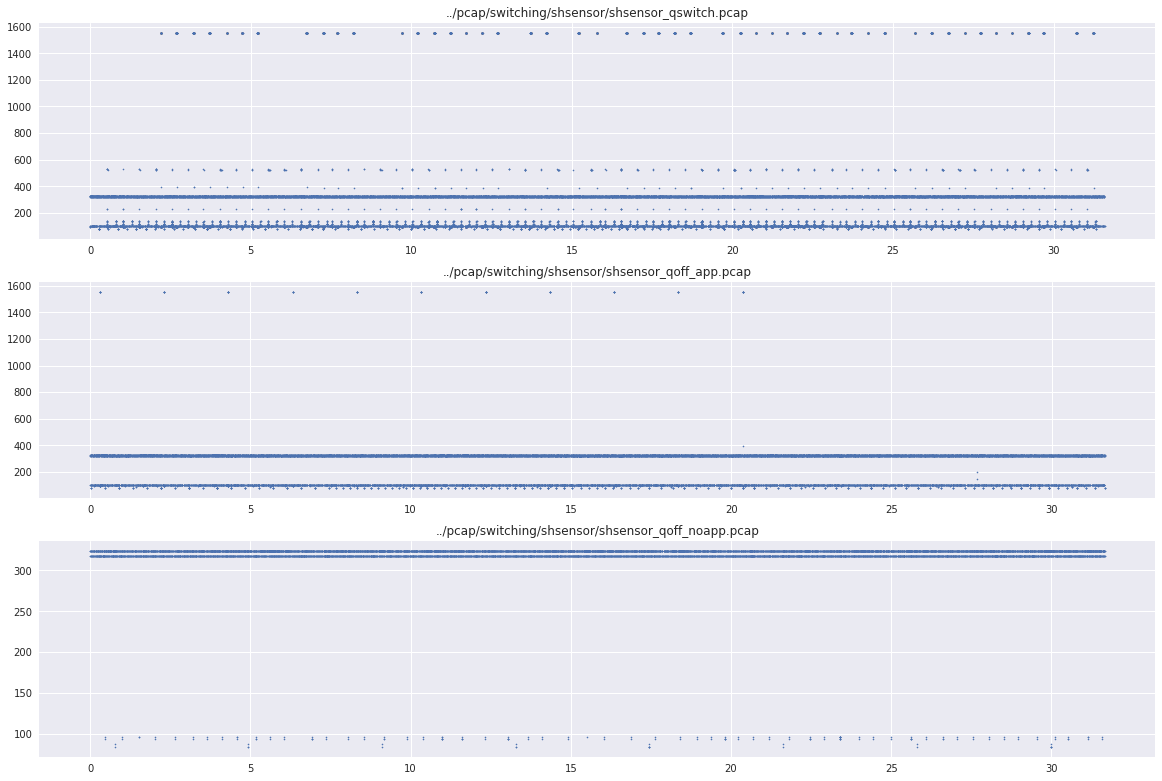

In [15]:
fig = plt.figure(figsize=(20, 4.5 * 3))
filt = filter_mac_any(shsensor_mac)
for i, pcap_name in enumerate(pcaps['shsensor']):
    ax = fig.add_subplot(3, 1, i + 1)
    xs, ys = map_pcap(len_radiotap, pcap_name, pktfilter=filt, lowest_layer=radiotap.Radiotap)
    ax.scatter(xs, ys, s=1.5)
    ax.set_title(pcap_name)

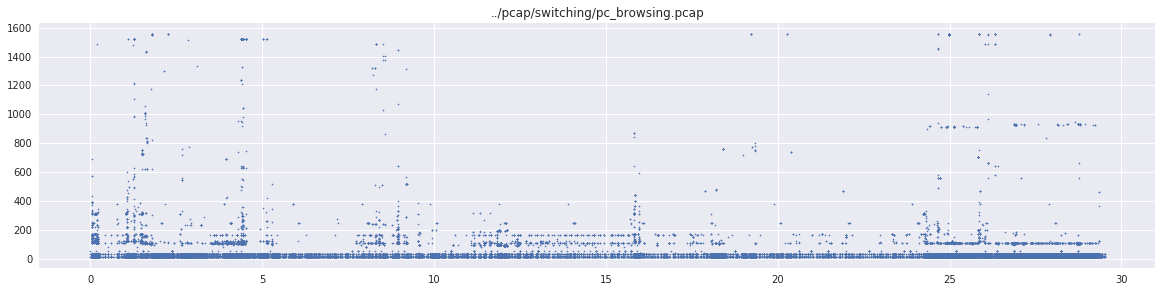

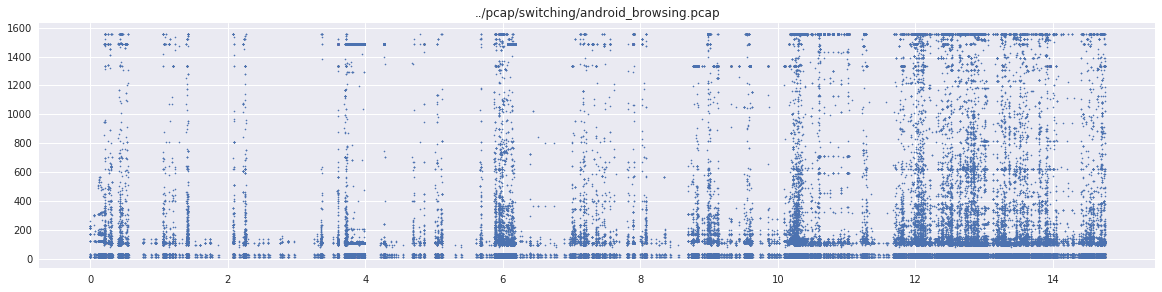

In [22]:
fig = plt.figure(figsize=(20, 4.5 * 1))
filt = filter_mac_any(pc_mac)
for i, pcap_name in enumerate(pcaps['pc']):
    ax = fig.add_subplot(1, 1, i + 1)
    xs, ys = map_pcap(len_radiotap, pcap_name, pktfilter=filt, lowest_layer=radiotap.Radiotap)
    ax.scatter(xs, ys, s=1.5)
    ax.set_title(pcap_name)

fig = plt.figure(figsize=(20, 4.5 * 1))
filt = filter_mac_any(android_mac)
for i, pcap_name in enumerate(pcaps['android']):
    ax = fig.add_subplot(1, 1, i + 1)
    xs, ys = map_pcap(len_radiotap, pcap_name, pktfilter=filt, lowest_layer=radiotap.Radiotap)
    ax.scatter(xs, ys, s=1.5)
    ax.set_title(pcap_name)

In [ ]:
capped = list(ppcap.Reader(wemo_update, lowest_layer=radiotap.Radiotap))
for ts, pkt in (capped[1611],):
    curr = pkt
    while curr is not None:
        print(curr)
        if hasattr(curr, 'dst_s'):
            assert hasattr(curr, 'src_s'), (pkt, curr)
            print(curr.dst, curr.src_s)
            break
        curr = curr.upper_layer
    else:
        assert False, (pkt, curr)